# **1) Máquina desregulada?**

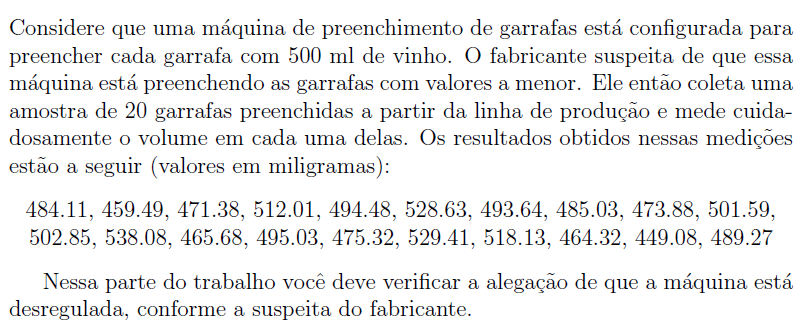

## **(i)**
Os procedimentos paramétricos de testes de hipóteses sobre uma amostra que estudamos em nosso curso presumem que a amostra a ser usada é proveniente de uma distribuição aproximadamente normal. Para a amostra fornecida, verifique essa hipótese usando dois dos testes de normalidade que estudamos no curso, o teste de Shapiro-Wilk e o teste usando QQ-plot. Nessa verificação, defina o nível de significância como α = 0,05.

Usando shapiro: 0.8223317265510559
A hipótese nula não pode ser rejeitada.
Usando QQ-Plot:


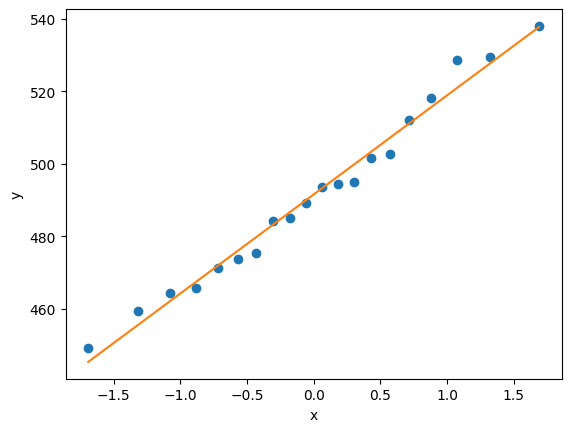

In [64]:
import numpy as np
from scipy import stats
from scipy.stats import shapiro, norm
import matplotlib.pyplot as plt

sample = np.array([484.11, 459.49, 471.38, 512.01, 494.48, 528.63, 493.64, 485.03, 473.88, 501.59, 502.85, 538.08, 465.68, 495.03, 475.32, 529.41, 518.13, 464.32, 449.08, 489.27])
sample = np.sort(sample)
n = len(sample)

statistic, pvalue = shapiro(sample)
alpha = 0.05
print("Usando shapiro:", pvalue)

if pvalue > alpha:
  print("A hipótese nula não pode ser rejeitada.")
else:
  print("A hipótese nula pode ser rejeitada.")

x = norm.ppf((np.arange(1, n + 1) - alpha)/((n + 1) - 2 * alpha))
y = sample

plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y, 'o')

regression = stats.linregress(x, y)
y = regression.slope * x + regression.intercept
print("Usando QQ-Plot:")
plt.plot(x, y);

**Explicação**

- Inseri os valores da amostra em um array, ordenei e vi seu tamanho.
- Utilizei a função shapiro para encontrar o p-valor e defini alfa como 5%.
- Caso p-valor seja maior que alfa, a hipótese nula não pode ser rejeitada.
- É criado o histograma da distribuição com 100 intervalos e então é mostrado na tela.
- Depois calculei a normal inversa e criei um gráfico e uma linha que acompanha a regressão.

## **(ii)**
Formule as hipóteses nula e alternativa. Seja consistente com o enunciado
fornecido.

**Resposta**

- Hipotese nula: A máquina não está desregulada, pois a média de vinho nas garrafas é aproximadamente 500 ml.

- Hipotese alternativa: A máquina está desregulada, pois a média de vinho nas garrafas não é de 500 ml.

## **(iii)**
A variância da população é desconhecida. Sendo assim, certifique-se de usar o procedimento de teste de hipóteses adequado para essa situação. Apresente sua análise para o nível de significância igual a 1%.

In [74]:
from scipy.stats import t
alpha = 0.01
expected_mean = 500

mean = np.mean(sample)
s = np.std(sample, ddof=1)
tscore = (mean - expected_mean)/(s/np.sqrt(n))

pvalue = 2 * t.cdf(tscore, df=n-1)
print("Média de vinho nas garrafas:", mean)
print("p-valor:", pvalue)

if pvalue > alpha:
  print("A hipótese nula não pode ser rejeitada: A máquina não aparenta estar desregulada, pois a média de vinho nas garrafas é aproximadamente 500 ml.")
else:
  print("A hipótese nula pode ser rejeitada: A máquina está desregulada, pois a média de vinho nas garrafas não é de 500 ml.")

Média de vinho nas garrafas: 491.5704999999999
p-valor: 0.14486225283258766
A hipótese nula não pode ser rejeitada: A máquina não aparenta estar desregulada, pois a média de vinho nas garrafas é aproximadamente 500 ml.


**Explicação**

- Estabeleci um nível de significância (0.01) e um valor esperado (500 ml) para a média de vinho nas garrafas.
- Calculei a média da amostra e o desvio padrão.
- Utilizei a estatística t para calcular o p-valor.
- Comparei o p-valor com o nível de significância para saber se rejeito ou não a hipótese nula.

# **2) Um estilo diferente ajuda?**

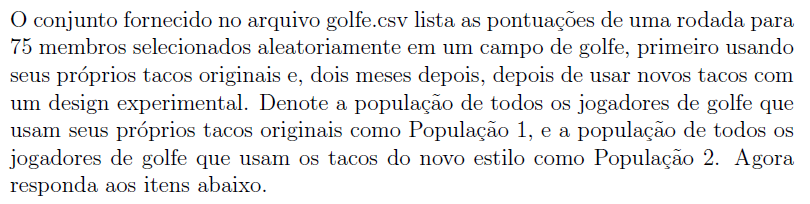

## **(i)**
Os procedimentos paramétricos de testes de hipóteses sobre duas amostras que estudamos em nosso curso presumem que as amostras a serem usadas são provenientes de uma distribuição aproximadamente normal. Para cada uma das amostras fornecidas, verifique essa hipótese usando dois dos testes de normalidade que estudamos no curso. Para isso, use um nível de significância igual a 5%.

In [92]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, normaltest

df = pd.read_excel('golfe.xls')
old_score = df[df.columns[1]]
new_score = df[df.columns[2]]
alpha = 0.05

def verifyHypothesis(pvalue, alpha):
    if pvalue < alpha:
      return 'A hipótese nula pode ser rejeitada: a amostra não é proveniente de uma distribuição normal.\n'
    else:
      return 'A hipótese nula não pode ser rejeitada: a amostra é proveniente de uma distribuição normal.\n'

result_old, pvalue_old = shapiro(old_score)
print('Usando shapiro - Old score: %.5f' %pvalue_old)
print(verifyHypothesis(pvalue_old, alpha))

result_old, pvalue_old = normaltest(old_score)
print('Usando dagostino - Old score: %.5f' %pvalue_old)
print(verifyHypothesis(pvalue_old, alpha))

result_new, pvalue_new = shapiro(new_score)
print('Usando shapiro - New score: %.5f' %pvalue_new)
print(verifyHypothesis(pvalue_new, alpha))

result_new, pvalue_new = normaltest(new_score)
print('Usando dagostino - New score: %.5f' %pvalue_new)
print(verifyHypothesis(pvalue_new, alpha))

Usando shapiro - Old score: 0.00002
A hipótese nula pode ser rejeitada: a amostra não é proveniente de uma distribuição normal.

Usando dagostino - Old score: 0.00000
A hipótese nula pode ser rejeitada: a amostra não é proveniente de uma distribuição normal.

Usando shapiro - New score: 0.00014
A hipótese nula pode ser rejeitada: a amostra não é proveniente de uma distribuição normal.

Usando dagostino - New score: 0.00055
A hipótese nula pode ser rejeitada: a amostra não é proveniente de uma distribuição normal.



**Explicação**

- Carreguei o conjunto de dados do arquivo 'golfe.xls' e extraí as colunas de 'old_score' e 'new_score'.
- Defini um nível de significância de 0.05.
- Criei uma função que compara o p-valor com o nível de significância e retorna uma mensagem indicando se a hipótese nula pode ser rejeitada ou não.
- Realizei testes de normalidade nas amostras 'old_score' e 'new_score' usando os testes de Shapiro-Wilk e D'Agostino.
- Imprimi os resultados dos testes e as mensagens de interpretação, indicando se as amostras seguem uma distribuição normal.

## **(ii)**
Agora, aplique o teste de hipóteses propriamente dito. Forneça a descrição detalhada dos quatro passos de aplicação do teste. Repare que a variância da população não é conhecida. Sendo assim, certifique-se de usar o teste de hipóteses adequado para essa situação. Apresente sua análise para o nível de significância igual a 1%. Repare que você deve aplicar o teste de hipóteses três vezes, pois existem três pares de amostras pareadas.

In [96]:
from scipy.stats import t

alpha = 0.01
delta = old_score - new_score
n = len(delta)
expected_mean = 0

mean = np.mean(delta)
sd = np.std(delta, ddof=1)
td = (mean - expected_mean)/(sd/np.sqrt(n))
pvalue = 2 * t.cdf(-td, df=n - 1)

if verifyHypothesis(pvalue, alpha) == "A hipótese nula pode ser rejeitada: a amostra não é proveniente de uma distribuição normal.\n":
    print("As pontuações dos jogadores de golfe que usam tacos antigos são divergentes das pontuações dos que usam tacos novos.")
else:
    print("As pontuações dos jogadores de golfe que usam tacos antigos não são divergentes das pontuações dos que usam tacos novos.")

As pontuações dos jogadores de golfe que usam tacos antigos são divergentes das pontuações dos que usam tacos novos.


**Explicação**

- Calculei a diferença entre as pontuações antigas e novas.
- Defini o nível de significância em 0.01.
- Calculei o tamanho da amostra "n" e a média esperada.
- Determinei a média das diferenças "delta" e o desvio padrão "sd."
- Calculei a estatística t com base na diferença média, o desvio padrão e o tamanho da amostra.
- Calculei o valor-p.
- Verifiquei se a hipótese nula pode ser rejeitada com base no valor-p e no nível de significância e forneci a análise.


# **3) Transmissões: automática versus manual**

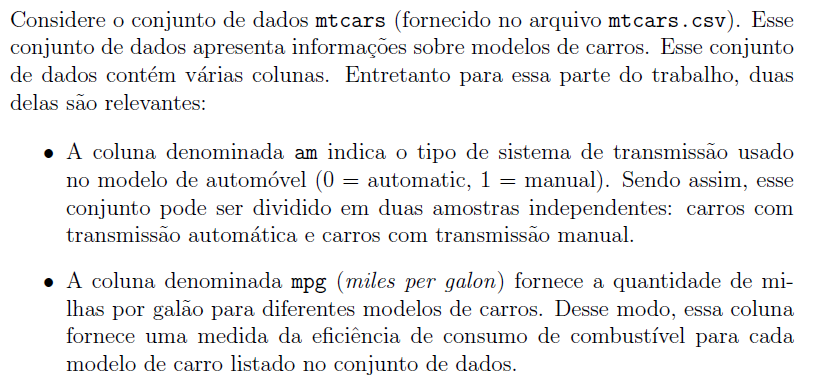

## **(i)**
Os procedimentos paramétricos de testes de hipóteses sobre duas amostras que estudamos em nosso curso presumem que as amostras a serem usadas são provenientes de uma distribuição aproximadamente normal. Para cada uma das amostras fornecidas, verifique essa hipótese usando dois dos testes de normalidade que estudamos no curso. Para isso, use um nível de significância igual a 5%.

In [97]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, normaltest

data = pd.read_csv('mtcars.csv')
auto = data[data['am'] == 0]['mpg']
manual = data[data['am'] == 1]['mpg']
alpha = 0.05

def verifyHypothesis(pvalue, alpha):
    if pvalue < alpha:
      return 'A hipótese nula pode ser rejeitada: a amostra não é proveniente de uma distribuição normal.\n'
    else:
      return 'A hipótese nula não pode ser rejeitada: a amostra é proveniente de uma distribuição normal.\n'

result_auto, pvalue_auto = shapiro(auto)
print('Usando shapiro - Carro automático: %.5f' %pvalue_auto)
print(verifyHypothesis(pvalue_auto, alpha))

result_auto, pvalue_auto = normaltest(auto)
print('Usando dagostino - Carro automático: %.5f' %pvalue_auto)
print(verifyHypothesis(pvalue_auto, alpha))

result_manual, pvalue_manual = shapiro(manual)
print('Usando shapiro - Carro manual: %.5f' %pvalue_manual)
print(verifyHypothesis(pvalue_manual, alpha))

result_manual, pvalue_manual = normaltest(manual)
print('Usando dagostino - Carro manual: %.5f' %pvalue_manual)
print(verifyHypothesis(pvalue_manual, alpha))

Usando shapiro - Carro automático: 0.89874
A hipótese nula não pode ser rejeitada: a amostra é proveniente de uma distribuição normal.

Usando dagostino - Carro automático: 0.98702
A hipótese nula não pode ser rejeitada: a amostra é proveniente de uma distribuição normal.

Usando shapiro - Carro manual: 0.53627
A hipótese nula não pode ser rejeitada: a amostra é proveniente de uma distribuição normal.

Usando dagostino - Carro manual: 0.51051
A hipótese nula não pode ser rejeitada: a amostra é proveniente de uma distribuição normal.



/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


**Explicação**

- Carreguei o conjunto de dados do arquivo 'mtcars.csv' e extraí os carros automáticos e manuais.
- Defini um nível de significância de 0.05.
- Criei uma função que compara o p-valor com o nível de significância e retorna uma mensagem indicando se a hipótese nula pode ser rejeitada ou não.
- Realizei testes de normalidade nas amostras usando os testes de Shapiro-Wilk e D'Agostino.
- Imprimi os resultados dos testes e as mensagens de interpretação, indicando se as amostras seguem uma distribuição normal.

## **(ii)**
Presumindo que os dados da coluna mpg seguem uma distribuição normal, determine um intervalo de confiança no nível de 95% para a diferença entre as médias dos modelos de carros que possuem transmissão automática e os que possuem transmissão manual.

In [111]:
import scipy.stats as st

confidence = 0.95
delta = auto - manual
n = len(delta)

mean = auto.mean() - manual.mean()
std = auto.std() - manual.std()
td = std/np.sqrt(n)

critvalue = st.norm.ppf((1 - confidence)/2)
x = mean - np.abs(critvalue) * td
y = mean + np.abs(critvalue) * td

print(f"Intervalo com nível de confiança em 95%: ({x}, {y})")

Intervalo com nível de confiança em 95%: (-6.436771137237026, -8.053107405273087)


**Explicação**

- Calculei a diferença entre as médias de carros com transmissão automática e manual.
- Defini o nível de confiança em 95%.
- Calculei a diferença entre as médias das duas amostras e o desvio padrão dessa diferença.
- Determinei o valor crítico com base no nível de confiança, que corresponde a um intervalo bilateral, então dividi o erro alfa por 2.
- Calculei e imprimi o intervalo de confiança.

## **(iii)**
Suponha que, ao analisar os dados fornecidos, alguém levantou a alegação de que carros automáticos e manuais não apresentam a mesma eficiência relativa ao consumo de combustível. Em particular, existe a suspeita de que carros com transmissão manual consumam (em média) menos combustível que suas contrapartidas com transmissão automática. Para testar essa suspeita, vou aplicar um teste de hipóteses e seguir os quatro passos usuais para a aplicação desse teste. As amostras são independentes, então usaremos o teste adequado para essa situação. Vou realizar a análise com um nível de significância de 5%. Apresente sua análise para o nível de significância igual a 5%.

In [116]:
from scipy.stats import ttest_ind

alpha = 0.05
statistic, pvalue = ttest_ind(manual, auto, alternative='two-sided')

print('p-valor: %.5f' %pvalue)
if verifyHypothesis(pvalue, alpha) == "A hipótese nula pode ser rejeitada: a amostra não é proveniente de uma distribuição normal.\n":
    print("Carros com transmissão manual consomem menos combustível do que carros com transmissão automática.")
else:
    print("Carros com transmissão manual consomem a mesma quantidade de combustível do que carros com transmissão automática.")

p-valor: 0.00029
Carros com transmissão manual consomem menos combustível do que carros com transmissão automática.


**Explicação**

- Defini o nível de significância como 0.05.
- Calculei a estatística de teste o p-valor usando o teste t de duas amostras independentes para comparar as amostras de carros com transmissão manual e carros com transmissão automática.
- Imprimi o valor p com cinco casas decimais.
- Usei uma função para verificar se a hipótese nula pode ser rejeitada com base no valor p.

# **4) Teste ANOVA**

## **4.1 Situação-problema I**

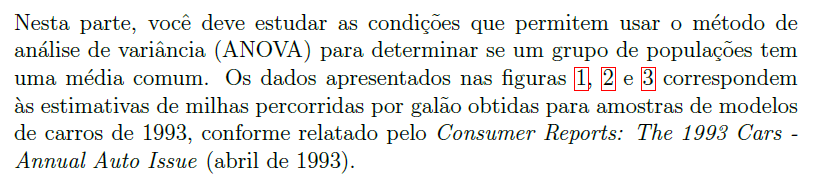

### **(i)**
Se uma ou mais das amostras não passa no teste de normalidade, então não podemos usar o método ANOVA. Sendo assim, antes de poder usar esse teste, devemos verificar as condições de aplicabilidade dele. Primeiro, verificamos se as amostras são aproximadamente normalmente distribuídas. Em seguida, usando o teste de Levene, verificamos se as amostras possuem variâncias iguais do ponto de vista estatístico.

In [22]:
import pandas as pd
import numpy as np
from scipy.stats import levene, shapiro


compactos = np.array ([20 , 25, 25, 20, 22, 22, 24, 26, 20, 24, 24, 23, 20, 23, 21, 21])
medios = np.array ([18 , 19, 22, 22, 19, 16, 21, 21, 21, 20 ,17 , 18, 18, 17, 19, 19, 18, 21, 23, 19, 22, 20])
grandes = np.array ([19 , 16, 16, 17, 20, 20, 20, 18, 18, 19, 19, 15, 18, 17, 15, 18, 17, 18, 18, 17])
alpha = 0.05

def verifyHypothesis(pvalue, alpha):
    if pvalue < alpha:
      return 'A hipótese nula pode ser rejeitada: a amostra não é proveniente de uma distribuição normal.\n'
    else:
      return 'A hipótese nula não pode ser rejeitada: a amostra é proveniente de uma distribuição normal.\n'

result_compactos, pvalue_compactos = shapiro(compactos)
print('Usando shapiro - Carros compactos: %.5f' %pvalue_compactos)
print(verifyHypothesis(pvalue_compactos, alpha))

result_medios, pvalue_medios = shapiro(medios)
print('Usando shapiro - Carros medios: %.5f' %pvalue_medios)
print(verifyHypothesis(pvalue_medios, alpha))

result_grandes, pvalue_grandes = shapiro(grandes)
print('Usando shapiro - Carros grandes: %.5f' %pvalue_grandes)
print(verifyHypothesis(pvalue_grandes, alpha))

result_levene, pvalue_levene = levene(compactos, medios, grandes, center = 'mean')
print('Usando levene - Todos os carros: %.5f' %pvalue_levene)
print(verifyHypothesis(pvalue_levene, alpha))

Usando shapiro - Carros compactos: 0.13664
A hipótese nula não pode ser rejeitada: a amostra é proveniente de uma distribuição normal.

Usando shapiro - Carros medios: 0.46938
A hipótese nula não pode ser rejeitada: a amostra é proveniente de uma distribuição normal.

Usando shapiro - Carros grandes: 0.20413
A hipótese nula não pode ser rejeitada: a amostra é proveniente de uma distribuição normal.

Usando levene - Todos os carros: 0.18531
A hipótese nula não pode ser rejeitada: a amostra é proveniente de uma distribuição normal.



**Explicação**

- Defini três conjuntos de dados para representar os carros compactos, médios e grandes.
- Defini um nível de significância igual a 0.05.
- Criei uma função para verificar se a amostra passa no teste de normalidade.
- Apliquei o teste de Shapiro para cada conjunto de dados, verificando se eles seguem uma distribuição normal.
- Apliquei o teste de Levene para verificar se as amostras possuem variâncias iguais.
- Imprimi os resultados dos testes de normalidade e o resultado do teste de Levene, indicando se as amostras passaram nos testes de normalidade e de igualdade de variâncias.

### **(ii)**
Agora que você verificou as condições de aplicabilidade do ANOVA, aplique esse teste para verificar a hipótese nula de que as três populações têm médias estatisticamente iguais. Declare as hipóteses nula e alternativa. Em seguida, descreva sua conclusão. Use nível de significância de 5%.

In [8]:
from scipy.stats import f_oneway

alpha = 0.05
satatic, pvalue = f_oneway(compactos, medios, grandes)

if pvalue < alpha:
  print("Há diferenças entre os três tipos de carros.")
else:
  print("Não há diferenças entre os três tipos de carros.")

Há diferenças entre os três tipos de carros.


**Explicação**

- Aplica o teste ANOVA para comparar as médias de três grupos de carros: compactos, médios e grandes.
- Compara o p-valor com o nível de significância que foi previamente definido.
- Se o p-valor for menor que o nível de significância, isso indica que há diferenças estatisticamente significativas entre as médias dos três grupos de carros.
- Senão, isso sugere que não há diferenças estatisticamente significativas entre as médias dos grupos de carros.

## **4.2 Situação-problema II**

### **(i)**
No link http://www.flatworldknowledge.com/sites/all/files/data9.xls, você encontra dados que registram os custos de materiais (livros didáticos, manuais de soluções, taxas de laboratório e assim por diante) em cada um dos dez cursos diferentes nas três disciplinas: química, ciência da computação e matemática. Verifique se, ao nível de significância de 1%, os dados fornecem evidências suficientes para concluir que os custos médios nas três disciplinas não são todos iguais. Apresente os detalhes de aplicação dos quatro passos do teste de hipóteses.

In [23]:
import pandas as pd

df = pd.read_excel('data9.xls')
math_costs = df[df['Cource'].str.startswith("MATH")]['Cost']
comp_costs = df[df['Cource'].str.startswith("COMP")]['Cost']
chem_costs = df[df['Cource'].str.startswith("CHEM")]['Cost']

alpha = 0.01
statistic, pvalue = f_oneway(math_costs, comp_costs, chem_costs)

if pvalue < alpha:
  print("Há diferenças entre as três disciplinas.")
else:
  print("Não há diferenças entre as três disciplinas.")

Não há diferenças entre as três disciplinas.


**Explicação**

- Carreguei os dados do arquivo em um dataframe.
- Separei os custos dos materiais em três grupos com base nas disciplinas.
- Defini um nível de significância de 0.01.
- Utilizei o teste ANOVA para comparar as médias dos custos nas três disciplinas.
- Se o p-valor calculado pelo teste foi menor que o nível de significância, conclui-se que há diferenças entre as três disciplinas.
- Caso contrário, conclui-se que não há diferenças.

# **5) Testes Qui-quadrado**

## **5.1 Distribuição χ²**

### **(i), (ii), (iii)**
Suponha que uma variável aleatória Y segue a distribuição χ² com k graus de liberdade, ou seja, Y ~ χ²(k). Por meio das funções apropriadas de R ou de Python, calcule o que é solicitado a seguir. Considere que k = 13.

In [20]:
from scipy.stats import chi2
k = 13

x = 2.56
probability = 1 - chi2.cdf(x, k)
print('Pr(Y > 2.56):', probability)

x1 = 2.56
x2 = 4.87
probability1 = chi2.cdf(x1, k)
probability2 = chi2.cdf(x2, k)
probability = probability2 - probability1
print('Pr(2.56 < Y < 4.87) =', probability)

probability = 0.95
y = chi2.ppf(probability, k)
print('O valor de y tal que Pr(Y < y) = 0.95:', y)

Pr(Y > 2.56): 0.9991125857338248
Pr(2.56 < Y < 4.87) = 0.021168183378387335
O valor de y tal que Pr(Y < y) = 0.95: 22.362032494826934


**Explicação**

- Na primeira parte, calculo a probabilidade de Y ser maior que 2.56, considerando k = 13 graus de liberdade.
- Na segunda parte, calculo a probabilidade de Y estar entre 2.56 e 4.87.
- Por fim, encontro o valor de y para o qual Pr(Y < y) seja igual a 0.95.

## **5.2 Teste χ² (situação-problema I)**

### **(i)**
Considere novamente o conjunto de dados denominado mtcars. Para este conjunto de dados, descubra se as variáveis "cyl" e "carb" são ou não dependentes. Para isso, utilize o teste Qui-Quadrado. Apresente o desenvolvimento, isto é, os comandos em R ou Python que você utilizou para chegar à conclusão.

In [27]:
import pandas as pd
from scipy.stats import chi2_contingency

df = pd.read_csv('mtcars.csv')
contingency = pd.crosstab(df.cyl, df.carb)

alpha = 0.05
result, pvalue, dof, expected = chi2_contingency(contingency)
print("p-valor:", pvalue)

if pvalue < alpha:
  print('Rejeitar a hipótese nula: As variáveis cyl e carb são dependentes.')
else:
  print('Não rejeitar a hipótese nula: As variáveis cyl e carb não são dependentes.')

p-valor: 0.006632477762992059
Rejeitar a hipótese nula: As variáveis cyl e carb são dependentes.


**Explicação**

- Carreguei um conjunto de dados do arquivo em um dataframe.
- Criei uma tabela de contingência para contar a frequência de ocorrências das combinações de valores nas colunas 'cyl' e 'carb'.
- Defini um nível de significância para o teste de 0.05.
- Apliquei o teste de independência qui-quadrado na tabela de contingência.
- Comparei o p-valor com o nível de significância para determinar se rejeito ou não a hipótese nula.

## **5.3 Teste χ² (situação-problema II)**

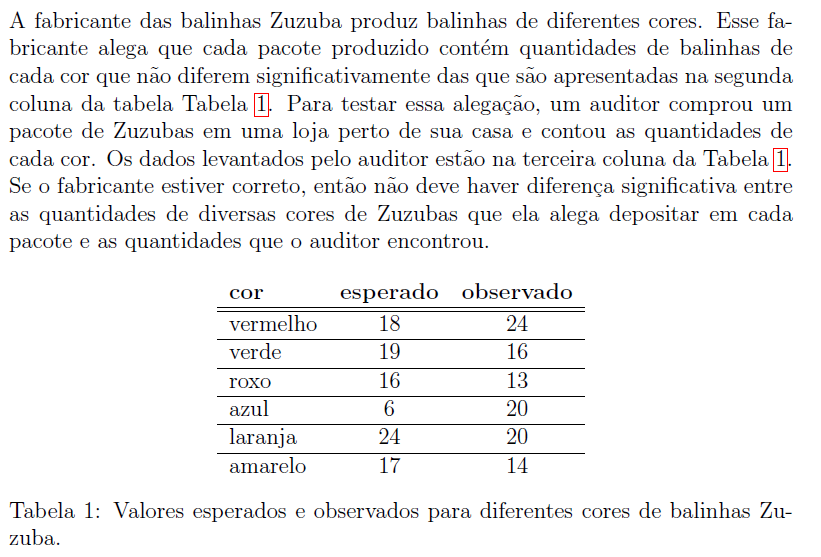

### **(i)**
Utilizando R ou Python, apresente dois gráficos de setores (pie charts), um para as quantidades esperadas e outro para as quantidades observadas de cores.

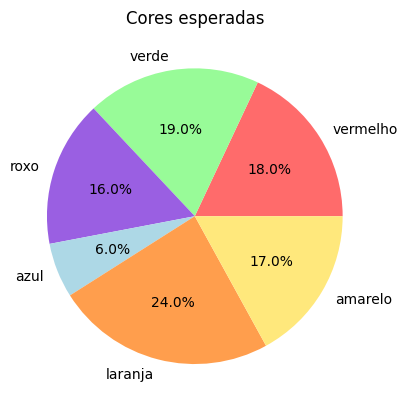

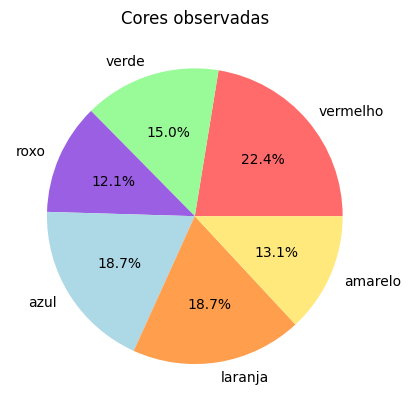

In [69]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
df = {"cores_nome": ['vermelho', 'verde', 'roxo', 'azul', 'laranja', 'amarelo'],
      "cores": ['#FF6B6B', '#98FB98', '#9A5FE2', '#ADD8E6', '#FF9E4D', '#FFE87C'],
      "esperadas": [18, 19, 16, 6, 24, 17],
      "observadas": [24, 16, 13, 20, 20, 14]}
df = pd.DataFrame(df)

plt.title("Cores esperadas")
plt.pie(df.esperadas, labels=df.cores_nome, colors=df.cores, autopct='%1.1f%%')
plt.show()

print()

plt.title("Cores observadas")
plt.pie(df.observadas, labels=df.cores_nome, colors=df.cores, autopct='%1.1f%%')
plt.show()

**Explicação**

- Na primeira parte, calculo a probabilidade de Y ser maior que 2.56, considerando k = 13 graus de liberdade.
- Na segunda parte, calculo a probabilidade de Y estar entre 2.56 e 4.87.
- Por fim, encontro o valor de y para o qual Pr(Y < y) seja igual a 0.95.

### **(ii)**
Também utilizando R ou Python, teste a hipótese nula de que a alegação do fabricante é verdadeira, utilizando um nível de significância de 0.05. Apresente os seguintes valores: graus de liberdade, valor da estatística e o valor-p. Apresente também a sua conclusão, a favor ou contra a hipótese nula, e justifique sua resposta.

In [82]:
from scipy.stats import chi2

alpha = 0.05
k = (len(df) - 1)**2
print(f'Graus de liberdade: {k}')

df['resultado'] = df.apply(lambda row: (row.observadas - row.esperadas) ** 2 / row.esperadas,axis=1)
statistic = df['resultado'].sum()
print('Estatística:', statistic)

p = 2 * (1 - chi2.cdf(statistic, k))
print('p-valor:', 2 * (1 - chi2.cdf(statistic,k)))

if p < 0.05:
    print("Rejeitar a hipótese nula: As quantidades de cores não são independentes.")
else:
    print("Não rejeitar a hipótese nula: As quantidades de cores são independentes.")

Graus de liberdade: 25
Estatística: 36.89892930856553
p-valor: 0.11804756306934094
Não rejeitar a hipótese nula: As quantidades de cores são independentes.


**Explicação**

- Defini o nível de significância como 0.05.
- Calculei o número de graus de liberdade usando o tamanho do dataframe.
- Adicionei uma coluna chamada 'resultado' ao df que contém os valores do teste qui-quadrado para cada combinação de valores observados e esperados.
- Calculei a estatística do qui-quadrado somando os valores da coluna 'resultado'.
- Calculei o valor-p e multipliquei por 2 para obter o valor-p bilateral.
- Com base no valor-p calculado, determinei se devo rejeitar ou não a hipótese nula..

## **5.4 Teste χ² (situação-problema III)**

Considere um caso hipotético no qual se deseja testar a eficácia de um medicamento para um determinado problema médico. Suponha que temos 105 pacientes em estudo, dos quais 50 foram tratados com a droga, enquanto os outros 55 pacientes serviram como amostras de controle. O estado de saúde de todos os pacientes foi avaliado após uma semana. Os dados e resultados para todos esses indivíduos estão disponíveis no arquivo treatment.csv.

Nesse cenário, temos duas variáveis discretas: uma indica se o paciente foi tratado com o medicamento (treated ou not-treated) e a outra indica se o paciente teve melhora ou não (improved ou not-improved).

### **(i)**
Utilizando R ou Python, verificaremos a alegação de que as duas variáveis são dependentes, usando nível de significância alfa = 0,05.

In [85]:
import pandas as pd
df = pd.read_csv ('treatment.csv')
contigency = pd.crosstab(df['treatment'], df['improvement'])

alpha = 0.05
chi2, pvalue, dof, expected = chi2_contingency(contigency)

if p < alpha:
    print("Rejeitar a hipótese nula: As variáveis não são independentes.")
else:
    print("Não rejeitar a hipótese nula: As variáveis são independentes.")

Não rejeitar a hipótese nula: As variáveis são independentes.


**Explicação**

- Em seguida, li os dados do arquivo e armazenei-os em um dataframe.
- Criar uma tabela de contingência a partir das colunas "treatment" e "improvement" do df.
- Defini um nível de significância de 0,05.
- Calculei a estatística qui-quadrado e o p-valor.
- Comparei o valor-p com o nível de significância para determinar se devo ou não rejeitar a hipótese nula.

## **5.5 Teste χ² (situação-problema IV)**

### **(i)**
No conjunto de dados disponível em http://www.flatworldknowledge.com/sites/all/files/data4.xls, estão registrados os resultados de 500 arremessos de um dado de seis lados. O objetivo é verificar, ao nível de significância de 10%, se há evidência suficiente para concluir que o dado não é "justo" (ou "balanceado"), ou seja, se a distribuição de probabilidade difere da probabilidade teórica de 1/6 para cada uma das seis faces do dado. Forneça a descrição detalhada dos quatro passos de aplicação do teste.

In [104]:
import pandas as pd
from scipy.stats import chisquare

df = pd.read_excel('data4.xls')

observed_frequencies = df['Die Result'].value_counts().sort_index().tolist()
expected_frequency = len(df) / 6
expected_frequencies = [expected_frequency] * 6

chi2, pvalue = chisquare(observed_frequencies,expected_frequencies)

print('Frequencias Observadas:', observed_frequencies)
print('Frequencias Esperadas:', expected_frequencies)
print('p-valor:', pvalue)

# Conclusão
alpha = 0.01  # Nível de significância de 10%
if pvalue < alpha:
    print('Rejeitar a hipótese nula: O dado não é justo.')
else:
    print('Não rejeitar a hipótese nula: O dado é justo.')

Frequencias Observadas: [80, 97, 81, 82, 77, 83]
Frequencias Esperadas: [83.33333333333333, 83.33333333333333, 83.33333333333333, 83.33333333333333, 83.33333333333333, 83.33333333333333]
p-valor: 0.7086191751824792
Não rejeitar a hipótese nula: O dado é justo.


**Explicação**

- Leio os resultados dos lançamentos desse dado a partir do arquivo.
- Em seguida, calculo as frequências observadas e a frequência esperada, que seria igualmente distribuída se o dado fosse justo.
- Utilizo o teste qui-quadrado para comparar as frequências observadas e esperadas.
- Apresento as frequências e o p-valor resultante do teste.
- Por fim, comparo o p-valor com um nível de significância para decidir se o dado é justo ou não.